In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from shutil import copyfile
import fingerprint_enhancer

In [154]:
x = 0
y = 0
for file in os.listdir('./LipPrintDatabase/'):
    img = cv2.imread('./LipPrintDatabase/' + str(file))
    x = max(x, img.shape[0])
    y = max(y, img.shape[1])

In [164]:
x

738

In [165]:
y

1444

In [2]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D

In [3]:
def create_model(inp_shape, output_dim):
    inputs = Input(inp_shape)
    x = Conv2D(32, (9, 9), padding = 'same', activation = 'relu')(inputs)
    x = MaxPooling2D(pool_size = (2, 2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(64, (7, 7), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)
    x = Dropout(0.2)(x)
    pooledoutput = GlobalAveragePooling2D()(x)
    outputs = Dense(output_dim)(pooledoutput)
    model = Model(inputs, outputs)
    return model

model1 = create_model((128, 128, 3), 100)

In [4]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      7808      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        100416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0     

In [5]:
def euclidian_distance(vector):
    (featsA, featsB) = vector
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


In [6]:
imgA = Input(shape = (128, 128, 3))
imgB = Input(shape = (128, 128, 3))
featsA = model1(imgA)
featsB = model1(imgB)


In [7]:
distance = Lambda(euclidian_distance)([featsA, featsB])
outputs = Dense(1, activation="sigmoid")(distance)
model = Model(inputs=[imgA, imgB], outputs=outputs)

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 100)          114724      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model[0][0]                

In [9]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [114]:
img_list = []
labels = []
x=738
y=1444
i=1
for file in os.listdir('./LipPrintDatabase'):
    img = cv2.imread('./LipPrintDatabase/' + str(file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = (255-img)
    enh = fingerprint_enhancer.enhance_Fingerprint(img)
    print(i)
    i+=1
    padded_img = np.pad(enh, [((x-enh.shape[0])//2, ), ((y-enh.shape[1])//2, )], mode='constant')
    cv2.imwrite('./ff/' + str(file), padded_img)
    img_list.append(padded_img)
    t = int(file[1:4])
    labels.append(t-1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [85]:
np.save('img_pair.npy', img_pair)

In [84]:
np.save('label_pair.npy', label_pair)

In [91]:
data = np.load('img_pair.npy', allow_pickle = True)

In [92]:
data

array([[[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
        [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]],

       [[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
        [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]],

       [[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [11]:
temp = []
for file in os.listdir('./ff/'):
    img = load_img('./ff/' + file, target_size = (128, 128))
    img = img_to_array(img)
    temp.append(img)
temp = np.asarray(temp)

In [12]:
temp.shape

(700, 128, 128, 3)

In [28]:
np.save('temp.npy', temp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


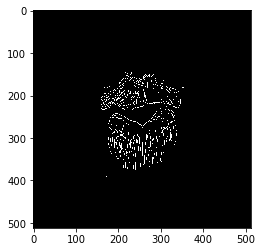

In [130]:
plt.imshow(temp1[8])

In [14]:
labels = np.load('labels.npy', allow_pickle = True)

In [16]:
img_list = np.load('temp.npy', allow_pickle = True)

In [17]:
img_list.shape

(700, 128, 128, 3)

In [18]:
img_pair = []
label_pair = []
numClasses = len(np.unique(labels))
idx = [np.where(labels == i)[0]  for i in range(0, numClasses)]
for i in range(len(img_list)):
    cur_img = img_list[i]
    cur_label = labels[i]
    j = np.random.choice(idx[cur_label])
    s_img = img_list[j]
    img_pair.append([cur_img, s_img])
    label_pair.append([1])
    negIdx = np.where(labels != cur_label)[0]
    negImage = img_list[np.random.choice(negIdx)]
    img_pair.append([cur_img, negImage])
    label_pair.append([0])
    
np_img_pair = np.array(img_pair)
np_label_pair = np.array(label_pair)

In [19]:
np_img_pair.shape

(1400, 2, 128, 128, 3)

In [20]:
np_label_pair.shape

(1400, 1)

In [21]:
np.save('np_img_pair.npy', np_img_pair)

In [22]:
np.save('np_label_pair.npy', np_label_pair)

In [23]:
np_img_pair = np.load('np_img_pair.npy', allow_pickle = True)

In [24]:
np_label_pair = np.load('np_label_pair.npy', allow_pickle = True)

In [23]:
history = model.fit([np_img_pair[:, 0], np_img_pair[:, 1]], np_label_pair[:], batch_size = 64, epochs = 50, verbose = 1)

Epoch 1/50
22/22 [==============================] - 13s 180ms/step - loss: 1.6414 - accuracy: 0.5156
Epoch 2/50
22/22 [==============================] - 3s 116ms/step - loss: 0.6594 - accuracy: 0.4950
Epoch 3/50
22/22 [==============================] - 3s 117ms/step - loss: 0.6385 - accuracy: 0.5181
Epoch 4/50
22/22 [==============================] - 3s 118ms/step - loss: 0.6378 - accuracy: 0.5079
Epoch 5/50
22/22 [==============================] - 3s 119ms/step - loss: 0.6394 - accuracy: 0.5163
Epoch 6/50
22/22 [==============================] - 3s 118ms/step - loss: 0.6178 - accuracy: 0.5288
Epoch 7/50
22/22 [==============================] - 3s 118ms/step - loss: 0.6125 - accuracy: 0.5177
Epoch 8/50
22/22 [==============================] - 3s 120ms/step - loss: 0.6104 - accuracy: 0.5247
Epoch 9/50
22/22 [==============================] - 3s 121ms/step - loss: 0.5937 - accuracy: 0.5597
Epoch 10/50
22/22 [==============================] - 3s 122ms/step - loss: 0.5891 - accuracy: 0.569

In [26]:
img_list_test = []
i=0
for files in os.listdir('./ff/'):
    t = int(files[1:4])
    t-=1
    if t==i:
        img = load_img('./ff/' + files, target_size = (128, 128))
        img = img_to_array(img)
        img_list_test.append(img)
        i+=1

In [27]:
img_list_test = np.array(img_list_test)

In [37]:
acc=[]
img = load_img('U004L04.png', target_size = (128, 128))
img = img_to_array(img)
for i in img_list_test:
    img = img.reshape((1, 128, 128, 3))
    acc.append(model.predict([img, i.reshape((1, 128, 128, 3))]))

In [32]:
img.shape

(1, 128, 128, 3)

In [38]:
max(acc)

array([[0.67235154]], dtype=float32)

In [39]:
acc.index(max(acc))

3

In [68]:
model.save('./save/lip_model')

INFO:tensorflow:Assets written to: ./save/lip_model\assets
